In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv("Advertising.csv")
df


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [39]:
df.sample(5)

,TV,radio,newspaper,sales
114,78.2,46.8,34.5,14.6
33,265.6,20.0,0.3,17.4
64,131.1,42.8,28.9,18.0
28,248.8,27.1,22.9,18.9
170,50.0,11.6,18.4,8.4


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [41]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


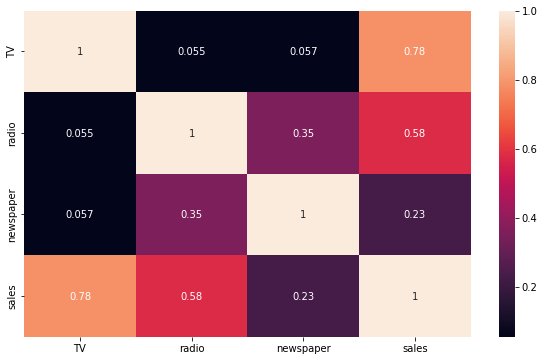

In [42]:
sns.heatmap(df.corr(), annot=True);

In [43]:
df["total_spend"] = df.TV + df.radio + df.newspaper
df


,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [44]:
df = df.iloc[:, [0, 1, 2, 4, 3]]
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


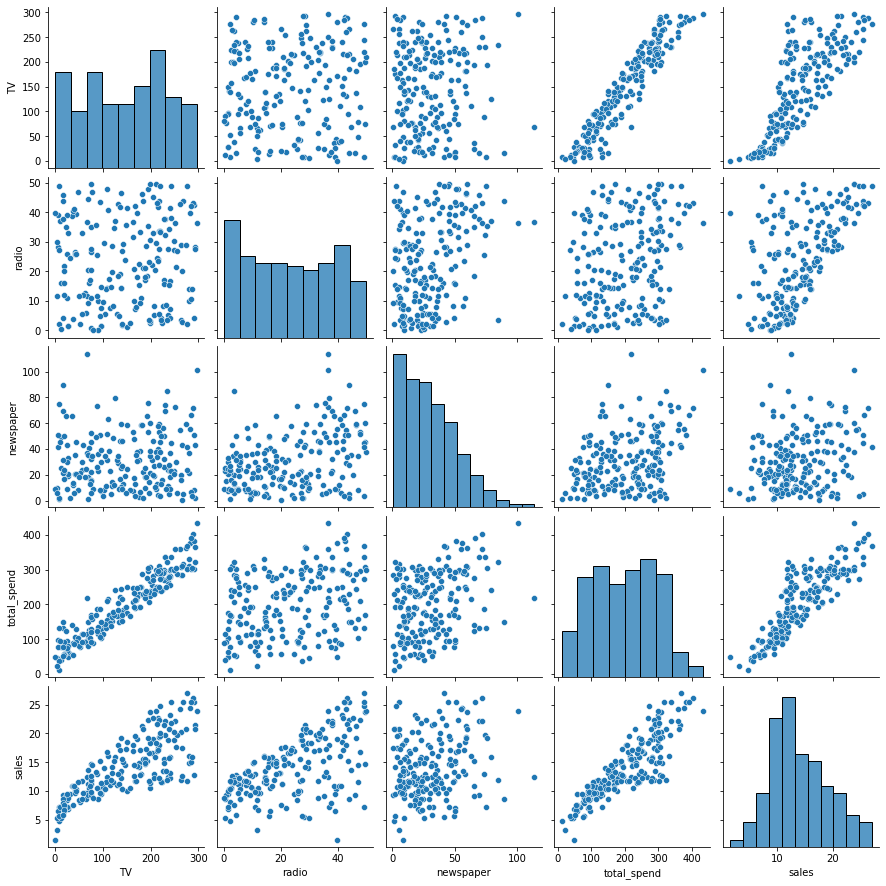

In [45]:
sns.pairplot(df);

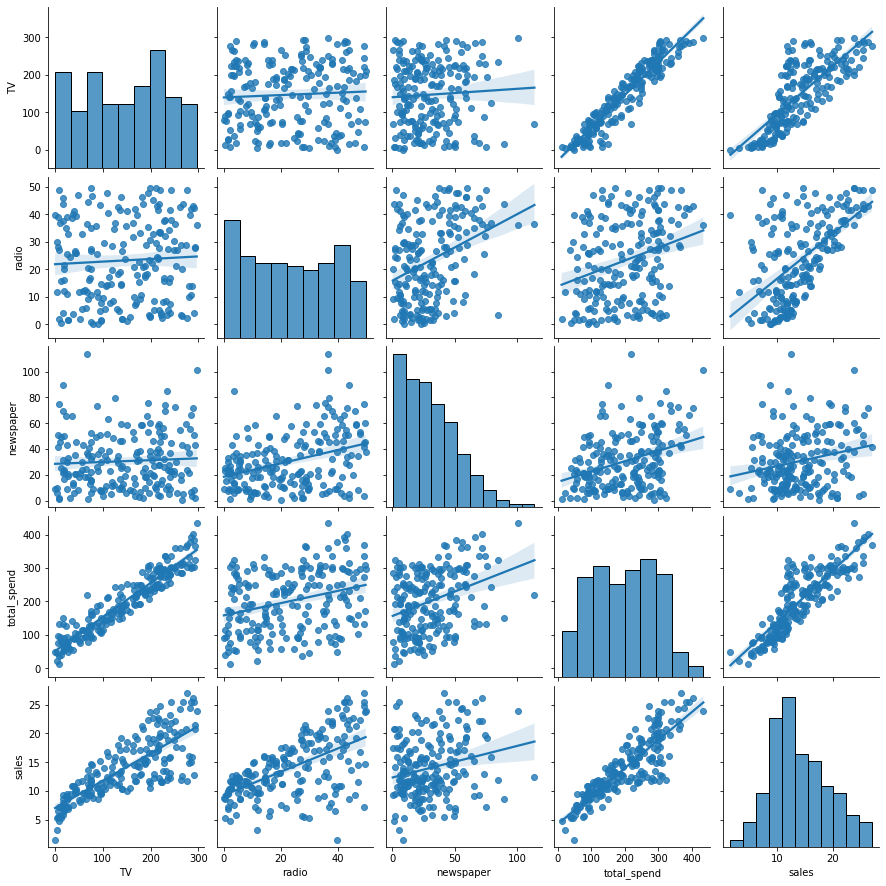

In [46]:
sns.pairplot(df, kind="reg");

In [47]:
for i in df.drop(columns="sales"):
  print(f"corr between sales and {i: <12}: {df.sales.corr(df[i])}")
  

corr between sales and TV          : 0.7822244248616066
corr between sales and radio       : 0.5762225745710552
corr between sales and newspaper   : 0.22829902637616534
corr between sales and total_spend : 0.8677123027017418


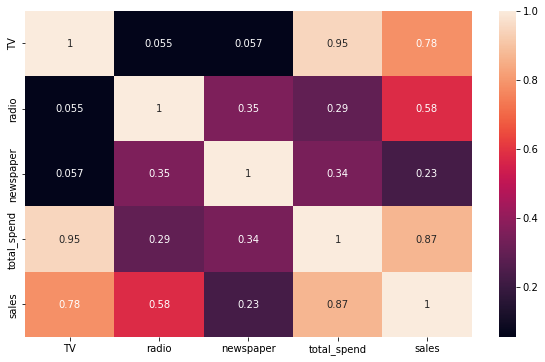

In [48]:
sns.heatmap(df.corr(), annot=True);

In [49]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


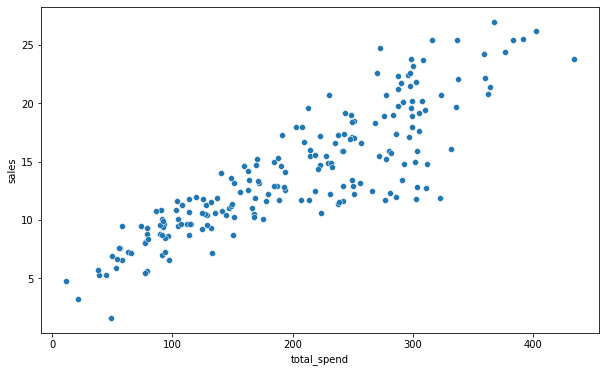

In [50]:
sns.scatterplot(x="total_spend", y="sales", data=df);

In [51]:
corr = df.sales.corr(df.total_spend)
corr


0.8677123027017418

## Coefficant of determination (R2)

In [52]:
R2_score = corr**2
R2_score

0.7529246402599592

## Lineer Regresyon

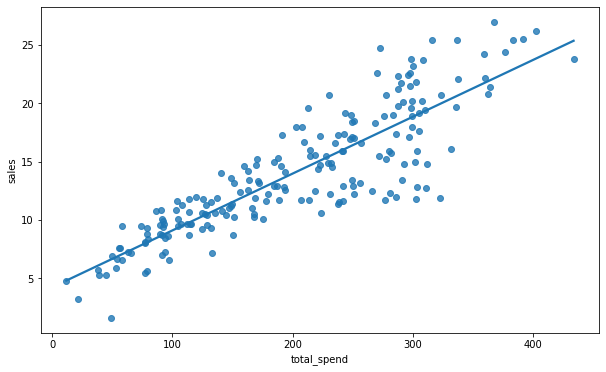

In [53]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None);

## Splitting the data set into X(independent var/feature) and Y(dependent var/target feature)

* Independent variables = X
* Dependent variables   = y
* y = b1 * X + b0
* y = target variable = dependent variable
* b1 = slope 0 < b1 < 1 and -1 < b1 < 0
* X = independent variable
* b0 = intercept -∞ < 0 < +∞

In [54]:
X = df["total_spend"]
y = df["sales"]

In [55]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

## Determination of coefficients(slope and intercept)

In [56]:
slope, intercept = np.polyfit(X, y, deg =1)
print("slope     :", slope)
print("intercept :", intercept)


slope     : 0.048687879319048145
intercept : 4.2430282160363255


In [57]:
b1, b0 = np.polyfit(X, y, deg=1)
y_pred = b1 * X + b0

In [58]:
values = {"actual": y, "predicted":y_pred, "residual": y - y_pred, "LSE" : (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2


,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [35]:
df_2.residual.sum()

8.810729923425242e-13

In [59]:
df_2.residual.sum().round()

0.0

In [27]:
df_2.LSE.sum()

1338.4439761715594

## Prediction with Simple Lineer Regression

In [60]:
potential_spend = np.linspace(0, 500, 100) 
potential_spend


array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [61]:
predicted_sales_lin = b1 * potential_spend + b0
predicted_sales_lin


array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

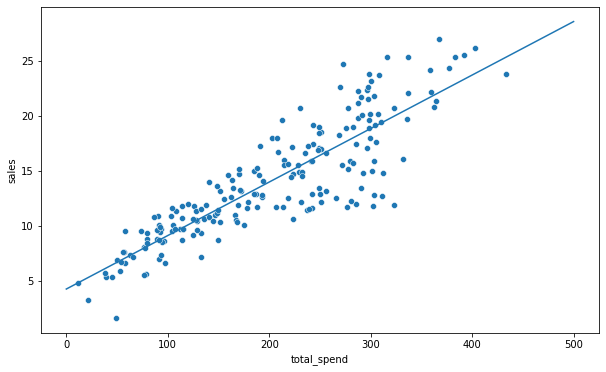

In [62]:
plt.plot(potential_spend, predicted_sales_lin);
sns.scatterplot(x="total_spend", y="sales", data=df);
